# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#added library
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns

%matplotlib inline

Mounted at /content/drive


In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
437,5,147,75,0,0,29.9,0.434,28,0
661,1,199,76,43,0,42.9,1.394,22,1
765,5,121,72,23,112,26.2,0.245,30,0
298,14,100,78,25,184,36.6,0.412,46,1
498,7,195,70,33,145,25.1,0.163,55,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes. Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 0.6821 - accuracy: 0.6632 - val_loss: 0.6716 - val_accuracy: 0.6823
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6736 - val_loss: 0.6568 - val_accuracy: 0.6927
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6858 - val_loss: 0.6438 - val_accuracy: 0.7031
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.6910 - val_loss: 0.6323 - val_accuracy: 0.7031
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6277 - accuracy: 0.6910 - val_loss: 0.6221 - val_accuracy: 0.7031
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.6944 - val_loss: 0.6130 - val_accuracy: 0.7083
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.6962 - val_loss: 0.6049 - val_accuracy: 0.7083
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 4ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.4563631 ],
       [0.7340873 ],
       [0.30115616],
       [0.15321237],
       [0.25950703],
       [0.46378532],
       [0.01251339],
       [0.35533315],
       [0.8351332 ],
       [0.16446422]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.792
roc-auc is 0.824


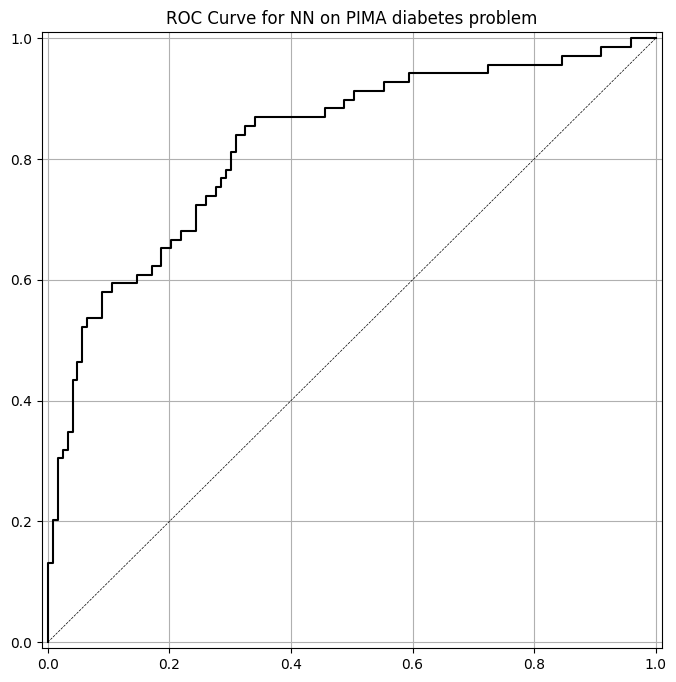

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

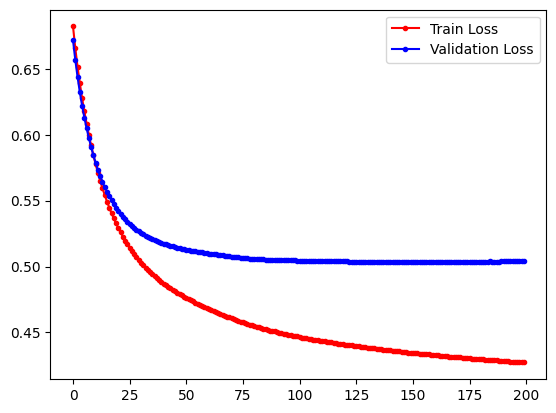

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- It appears that both the train loss and the validation loss are decreasing over time. This suggests that the model is improving and becoming more accurate in its predictions. The train loss represents the error rate of the model on the training data, while the validation loss represents the error rate on the validation data.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

**Build a model with two hidden layers, each with 6 nodes**

**Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer**

In [ ]:
model1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

**Use a learning rate of .003 and train for 1500 epochs**

In [ ]:
model1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])

In [ ]:
run_hist_2 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 0.7890 - accuracy: 0.3819 - val_loss: 0.7913 - val_accuracy: 0.4062
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7712 - accuracy: 0.3941 - val_loss: 0.7733 - val_accuracy: 0.4167
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7555 - accuracy: 0.4219 - val_loss: 0.7573 - val_accuracy: 0.4271
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7418 - accuracy: 0.4688 - val_loss: 0.7433 - val_accuracy: 0.4792
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7296 - accuracy: 0.5035 - val_loss: 0.7308 - val_accuracy: 0.5104
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7188 - accuracy: 0.5417 - val_loss: 0.7196 - val_accuracy: 0.5365
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.5660 - val_loss: 0.7096 - val_accuracy: 0.5521
Epoch

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Graph the trajectory of the loss functions, accuracy on both train and test set**

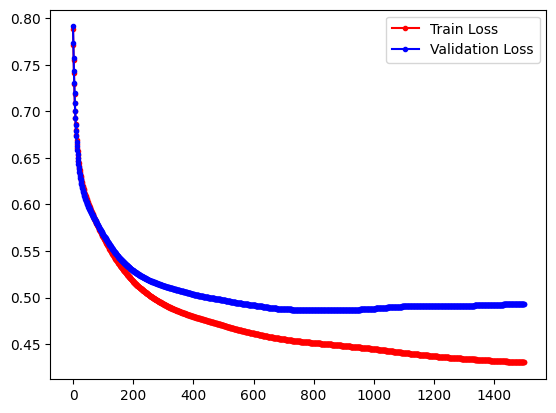

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Text(0.5, 1.0, 'Accuracy over iterations')

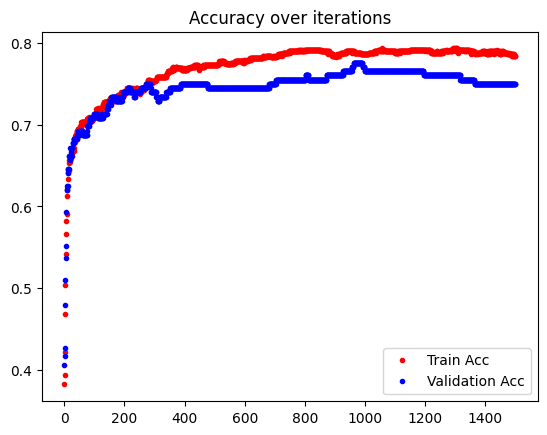

In [ ]:
fig, ax = plt.subplots()
ax.plot((run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot((run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

**Plot the roc curve for the predictions**

6/6 [==============================] - 0s 3ms/step
accuracy is 0.750
roc-auc is 0.824


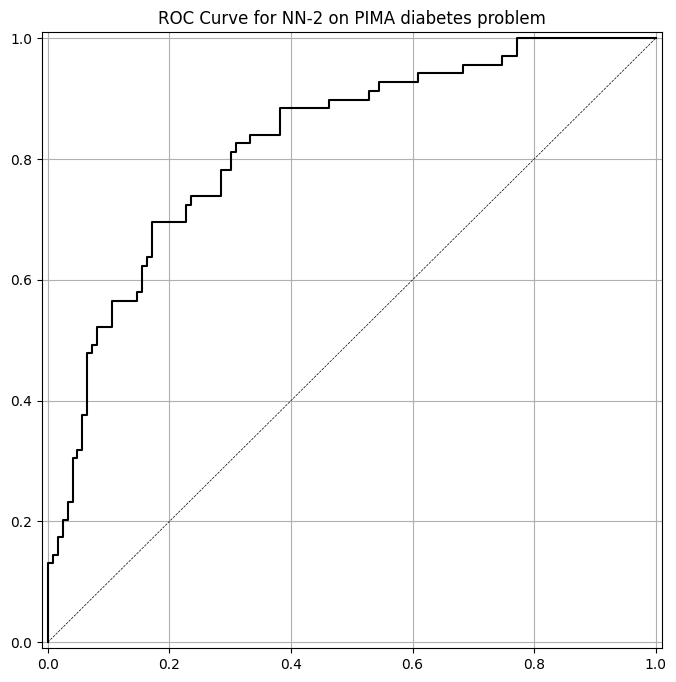

In [ ]:
y_pred_class_nn_2 = (model1.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model1.predict(X_test_norm)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')

**Use different learning rates, numbers of epochs, and network structures.**

**Plot the results of training and validation loss using different learning rates, number of epochs and network structures**

**Interpret your result**

In [ ]:
#using fnn
model3 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

model3.compile(optimizer=SGD(learning_rate = .002), loss="binary_crossentropy", metrics=["accuracy"])

run_hist_3 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 21ms/step - loss: 0.7142 - accuracy: 0.5903 - val_loss: 0.7321 - val_accuracy: 0.5833
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.7117 - accuracy: 0.6024 - val_loss: 0.7293 - val_accuracy: 0.5729
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.7094 - accuracy: 0.6042 - val_loss: 0.7267 - val_accuracy: 0.5729
Epoch 4/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.7070 - accuracy: 0.6042 - val_loss: 0.7241 - val_accuracy: 0.5729
Epoch 5/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.7048 - accuracy: 0.6042 - val_loss: 0.7215 - val_accuracy: 0.5729
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.7026 - accuracy: 0.6076 - val_loss: 0.7190 - val_accuracy: 0.5781
Epoch 7/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.7004 - accuracy: 0.6059 - val_loss: 0.7166 - val_accuracy: 0.5781
Epoch

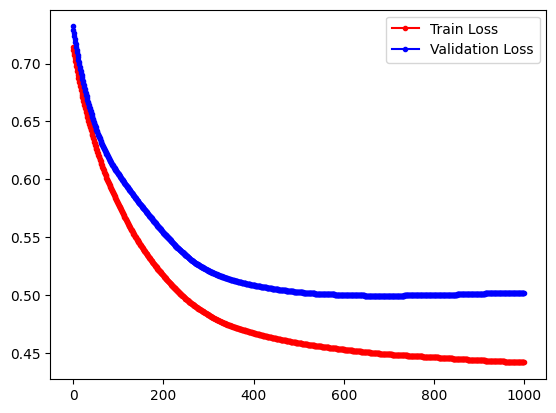

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"], 'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax.legend()

From the graph, it is evident that the training loss is higher than the validation loss. This suggests that the model may be overfitting, meaning it performs well on the training data but struggles to generalize to unseen data.

Text(0.5, 1.0, 'Accuracy over iterations')

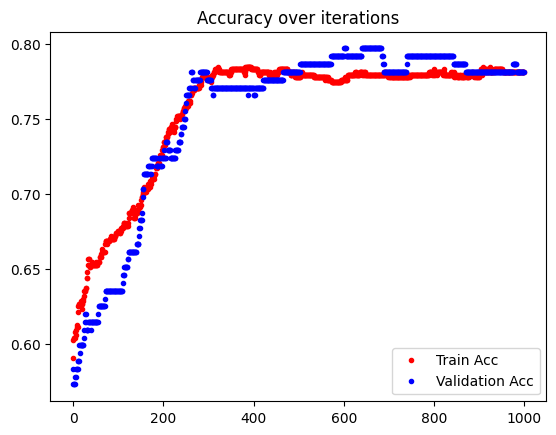

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["accuracy"], 'r.', label="Train Acc")
ax.plot(run_hist_3.history["val_accuracy"], 'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

Looking at the graph, it appears that the model's accuracy on the training data remains relatively stable and consistently high throughout the time period. This indicates that the model is able to effectively learn and predict the training data.

6/6 [==============================] - 0s 3ms/step
accuracy is 0.781
roc-auc is 0.822


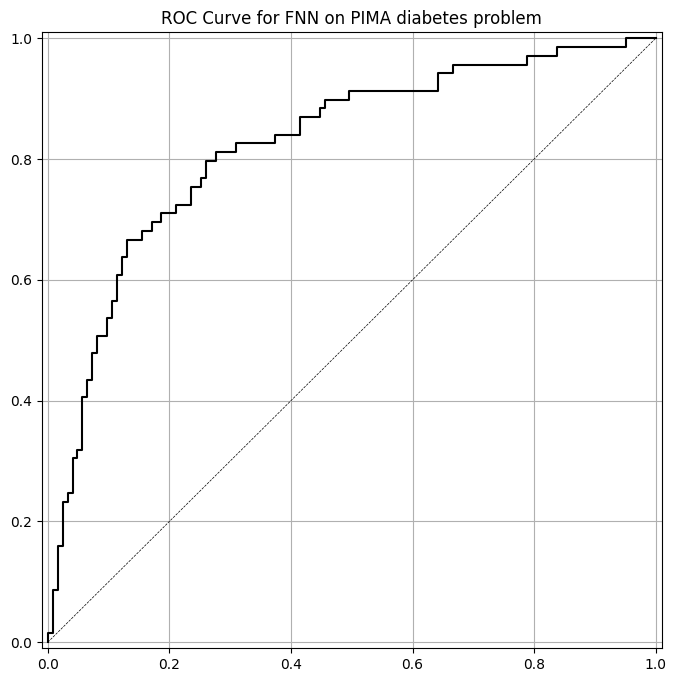

In [ ]:
y_pred_class_nn_3 = (model3.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_3 = model3.predict(X_test_norm)

print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'FNN')

In [ ]:
#using rnn
from keras.layers import LSTM

X_train_norm1 = np.reshape(X_train_norm, (X_train_norm.shape[0], 1, X_train_norm.shape[1]))
X_test_norm1 = np.reshape(X_test_norm, (X_test_norm.shape[0], 1, X_test_norm.shape[1]))

model4 = Sequential([
    LSTM(12, input_shape=(1, 8), activation="relu"),
    Dense(1, activation="sigmoid")
])

model4.compile(optimizer=SGD(learning_rate = .004), loss="binary_crossentropy", metrics=["accuracy"])

run_hist_4 = model4.fit(X_train_norm1, y_train, validation_data=(X_test_norm1, y_test), epochs=800)

Epoch 1/800
18/18 [==============================] - 2s 21ms/step - loss: 0.6958 - accuracy: 0.4462 - val_loss: 0.6894 - val_accuracy: 0.5208
Epoch 2/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4774 - val_loss: 0.6876 - val_accuracy: 0.5573
Epoch 3/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5330 - val_loss: 0.6858 - val_accuracy: 0.5990
Epoch 4/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5642 - val_loss: 0.6840 - val_accuracy: 0.6354
Epoch 5/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.6024 - val_loss: 0.6823 - val_accuracy: 0.6458
Epoch 6/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.6406 - val_loss: 0.6807 - val_accuracy: 0.6510
Epoch 7/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.6580 - val_loss: 0.6791 - val_accuracy: 0.6719
Epoch 8/800


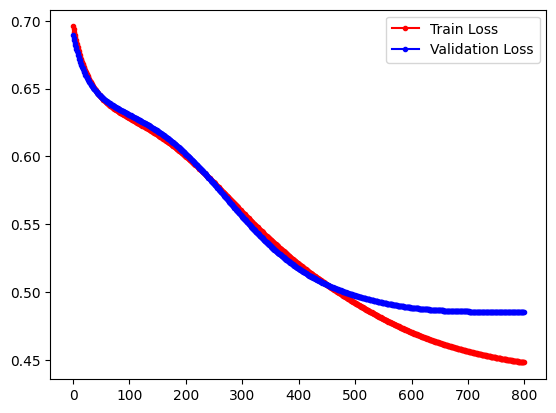

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

From the graph, it can be observed that both the training loss (red line) and validation loss (blue line) decrease over time. This indicates that the RNN model is learning and improving its performance as the training progresses.

Text(0.5, 1.0, 'Accuracy over iterations')

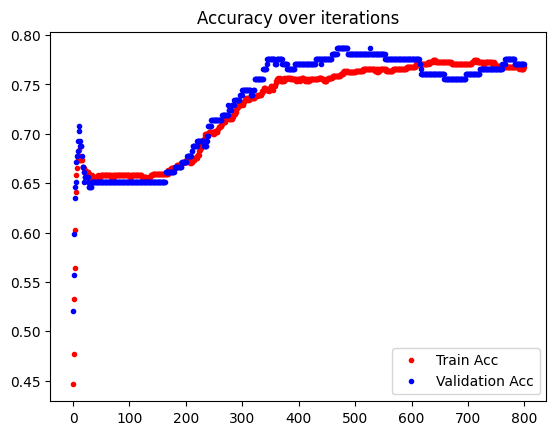

In [ ]:
fig, ax = plt.subplots()
ax.plot((run_hist_4.history["accuracy"]),'r.', label="Train Acc")
ax.plot((run_hist_4.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

Based on the graph, it can be observed that the recurrent neural network (RNN) model achieves a consistently high level of accuracy on the training data. This suggests that the model is successfully learning and making accurate predictions on the data it was trained on.

6/6 [==============================] - 0s 3ms/step
accuracy is 0.750
roc-auc is 0.824


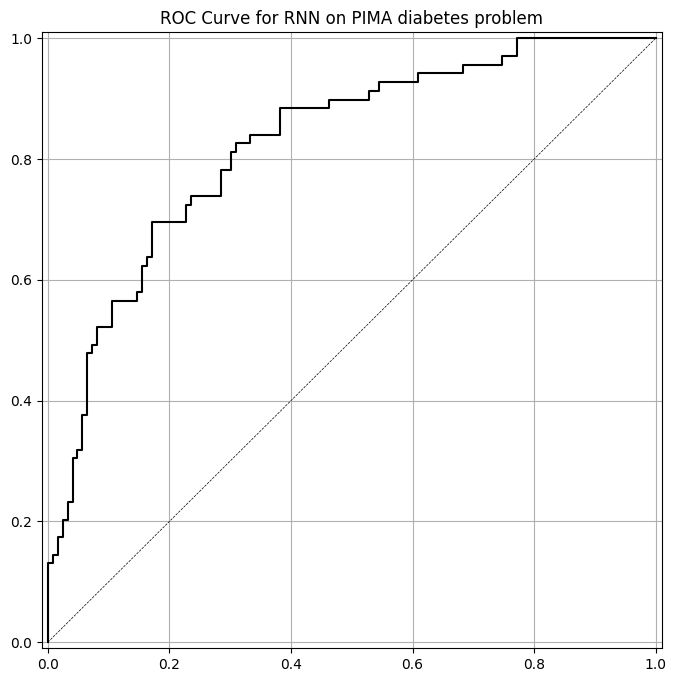

In [ ]:
y_pred_class_rnn_4 = (model1.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_rnn_4 = model1.predict(X_test_norm)

print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_rnn_4)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_rnn_4)))

plot_roc(y_test, y_pred_prob_rnn_4, 'RNN')

#### Conclusion

Training neural networks using Keras is a highly effective and efficient approach. Keras offers a user-friendly high-level API with a wide range of built-in tools and functions, making the process of building and training neural networks straightforward. The key steps involved in training neural networks using Keras include importing the necessary libraries such as Keras, NumPy, and Matplotlib, preprocessing the data by cleaning and transforming it into a suitable format, constructing the neural network architecture using different types of layers such as dense, convolutional, and recurrent layers, compiling the model by specifying the loss function, optimizer, and metrics, training the model by feeding the training data and adjusting the weights iteratively, evaluating the model's performance using the validation or test set, and finally, using the trained model to make predictions on new data.